# Import Libraries

In [32]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization and Image Processing
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import rand_score

# for loading/processing the images  
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input 
from keras.applications.xception import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.applications.xception import Xception
from keras.models import Model

# Others
import os 
import random
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
os.getcwd()

'/home/afsharino/Desktop/Computational-Intelligence/Contents/01. Unsupervised Learning/Assignments/Clustering-Project/src'

In [3]:
BASE_DIR = '../Dataset/dataset/'

In [4]:
def read_images(base_dir:str=BASE_DIR):
    images = []
    labels = []
    for file_name in os.listdir(BASE_DIR):
        try:
            image = Image.open(os.path.join(BASE_DIR, file_name))
            # Convert it from BGR to RGB so we can plot them later (because openCV reads images as BGR)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            label = file_name.split('.')[0][-2:]
            if image is not None:
                images.append(image)
                labels.append(label)
                
            else:
                print(f"Image {file_name} is None!")
        
        except Exception as e:
            print(f"Error: {e}")

    return images, labels
           

# Show Sample Images

In [5]:
images, labels = read_images()

In [6]:
def show_random_images(images, labels, num=2):
    sorted_labels = list(map(int, set(labels)))
    sorted_labels.sort()
    for code in sorted_labels:
        if len(str(code)) == 1:
            indicies = [i for i, label in enumerate(labels) if label == str(0)+str(code)]

        else:
            indicies = [i for i, label in enumerate(labels) if label == str(code)]
            
        random_indicies = [random.choice(indicies) for i in range(num)]
        figure, axis = plt.subplots(1, num)

        print("{} random images for code {}".format(num, code))

        for image in range(num):
            axis[image].imshow(images[random_indicies[image]])
        plt.show()
    

2 random images for code 1


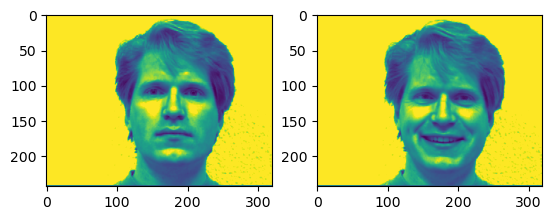

2 random images for code 2


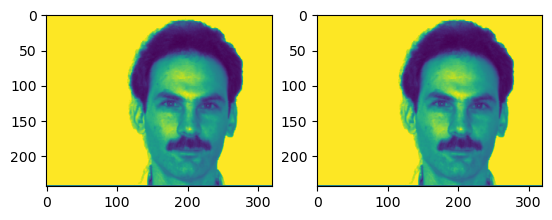

2 random images for code 3


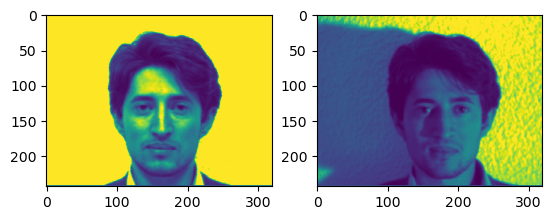

2 random images for code 4


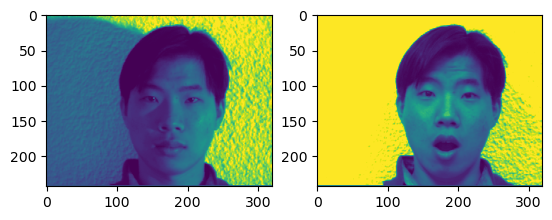

2 random images for code 5


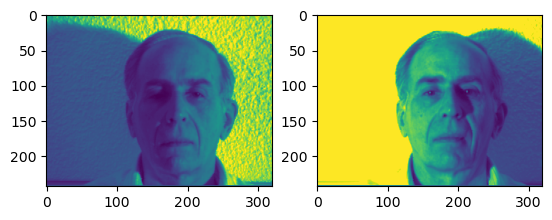

2 random images for code 6


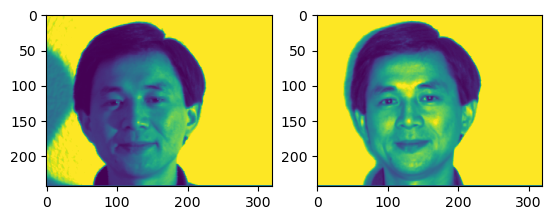

2 random images for code 7


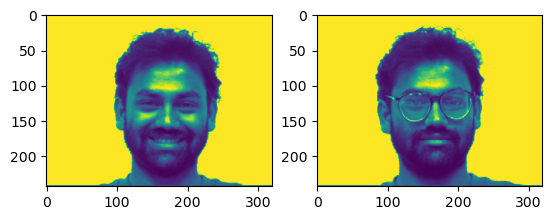

2 random images for code 8


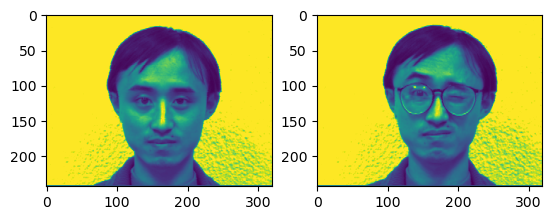

2 random images for code 9


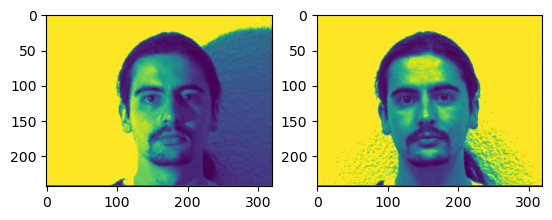

2 random images for code 10


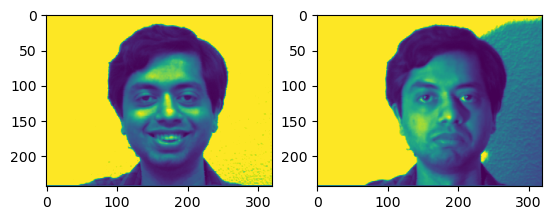

2 random images for code 11


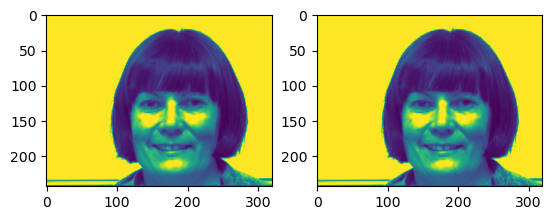

2 random images for code 12


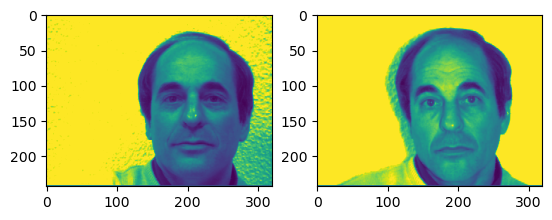

2 random images for code 13


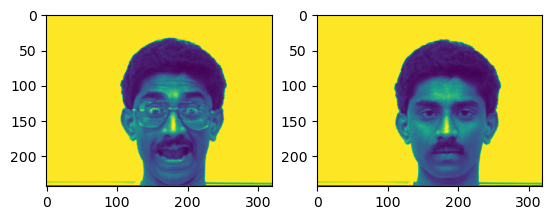

2 random images for code 14


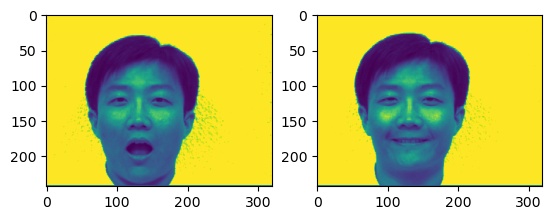

2 random images for code 15


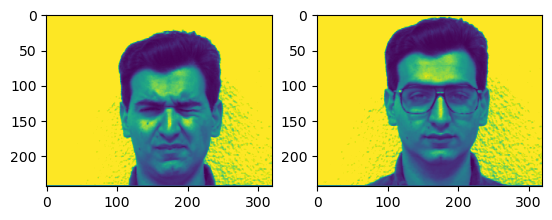

In [7]:
show_random_images(images, labels, num=2)

# Feature Extraction

In [20]:
# yale
images_path = []
for file in os.listdir(BASE_DIR):
    images_path.append(os.path.join(BASE_DIR, file))

In [21]:
# load the model first and pass as an argument
model = Xception()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    #yale_name
    name = file.split('/')[-1].split('.')[0]
    
    # load the image as a 224x224 array
    img = load_img(file, target_size=(299,299))
    
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,299,299,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    
    # Flatten the features to a 1D array
    features = features.flatten()

    return features, name

In [9]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    #yale_name
    name = file.split('/')[-1].split('.')[0]
    
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    
    # Flatten the features to a 1D array
    features = features.flatten()

    return features, name

2024-04-04 05:32:07.597549: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
features = []
labels = []

# lop through each image in the dataset
counter = 0
for path in images_path:
    # try to extract the features and update the dictionary
    feat, name = extract_features(path,model)
    print(f"{counter}\n")
    features.append(feat)
    labels.append(name)
    counter += 1

1/1 [==============================] - 4s 4s/step
0

1/1 [==============================] - 0s 286ms/step
1

1/1 [==============================] - 0s 282ms/step
2

1/1 [==============================] - 0s 348ms/step
3

1/1 [==============================] - 0s 352ms/step
4

1/1 [==============================] - 0s 366ms/step
5

1/1 [==============================] - 0s 294ms/step
6

1/1 [==============================] - 0s 323ms/step
7

1/1 [==============================] - 0s 284ms/step
8

1/1 [==============================] - 0s 327ms/step
9

1/1 [==============================] - 0s 343ms/step
10

1/1 [==============================] - 0s 269ms/step
11

1/1 [==============================] - 0s 290ms/step
12

1/1 [==============================] - 0s 306ms/step
13

1/1 [==============================] - 0s 276ms/step
14

1/1 [==============================] - 0s 290ms/step
15

1/1 [==============================] - 0s 271ms/step
16

1/1 [==============================] - 0s 30

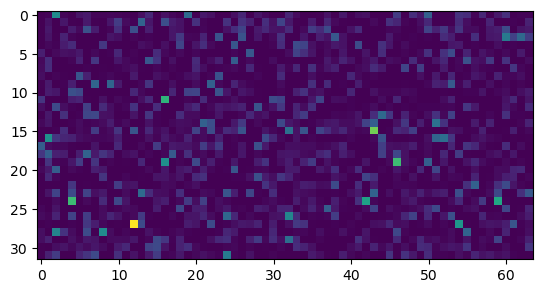

In [23]:
plt.imshow(features[0].reshape(32, -1))
plt.show()

In [24]:
unique_names = set(labels)
name_to_id = {name: i+1 for i, name in enumerate(unique_names)}
id_list = [name_to_id[name] for name in labels]

In [25]:
np.array(features).shape

(165, 2048)

# Dimention Reduction

In [26]:
X = np.array(features)
y = id_list
X_embedded = TSNE(n_components=2, learning_rate='auto',
                      init='random', perplexity=45, n_jobs=-1 ).fit_transform(X)


In [27]:
# Create a colormap for distinct colors for each class
num_classes = len(np.unique(labels))
colors = plt.cm.jet(np.linspace(0, 1, num_classes))

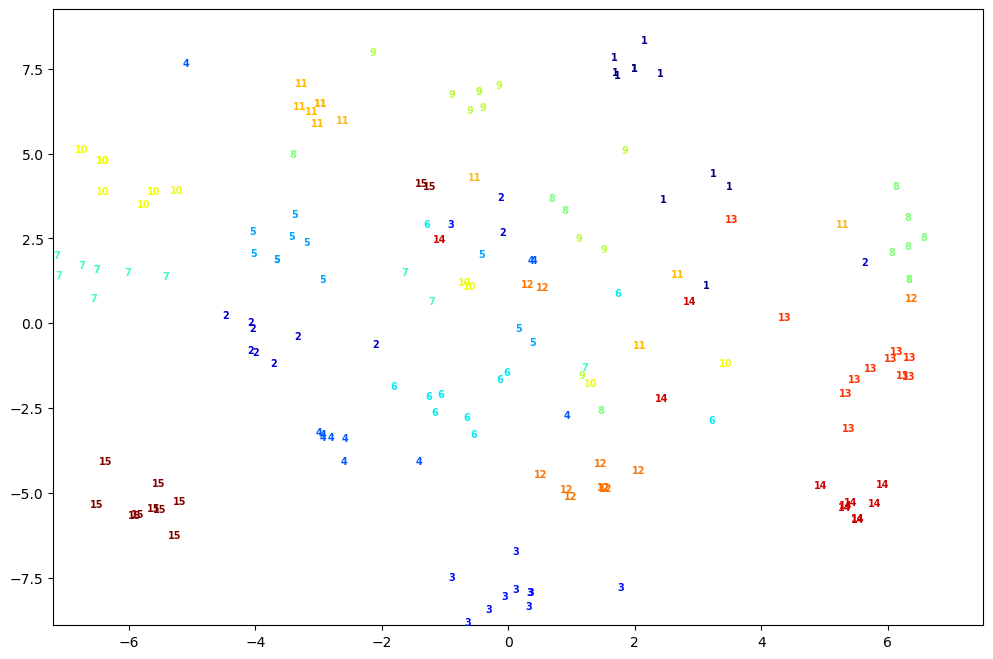

In [28]:
plt.figure(figsize=(12, 8))
plt.xlim(X_embedded[:, 0].min(), X_embedded[:, 0].max()+1)
plt.ylim(X_embedded[:, 1].min(), X_embedded[:, 1].max()+1)
for i in range(len(y)):
   # if y[i] == 3 :
        plt.text(X_embedded[i, 0], X_embedded[i, 1], y[i], color=colors[int(y[i])-1], fontdict={'weight': 'bold', 'size' : 7})
plt.show()

# Clustering

In [76]:
# Cluster the data using k-means
scores = []
num_clusters = []
pred_kmeans = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels_pred_kmeans = kmeans.fit_predict(X)
    score = rand_score(list(map(int, y)), labels_pred_kmeans)
    scores.append(score)
    num_clusters.append(i)
    pred_kmeans.append(labels_pred_kmeans)

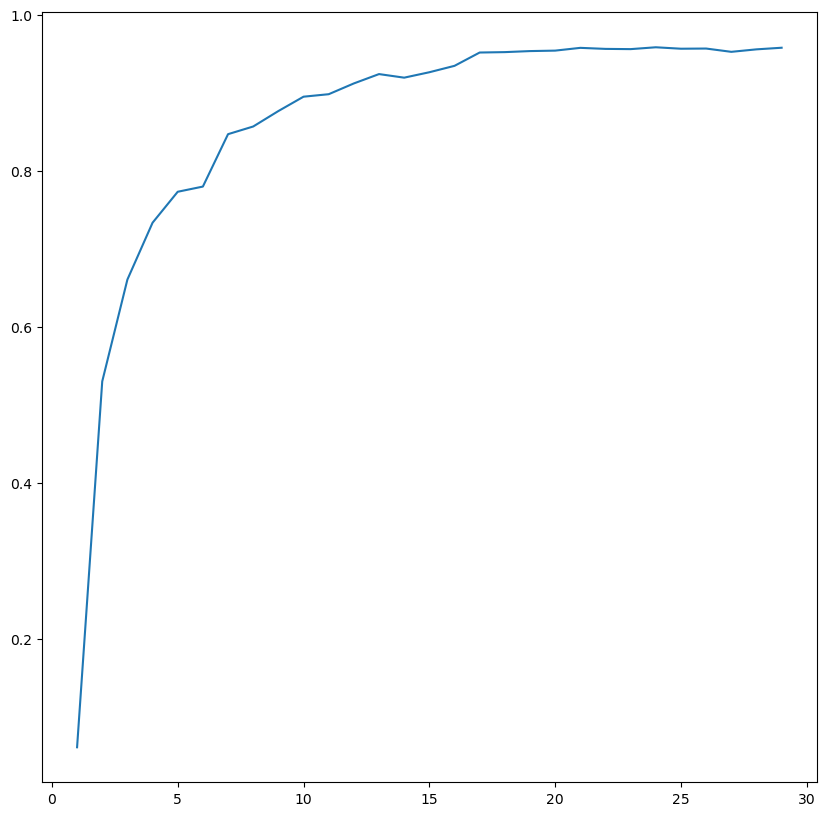

In [77]:
plt.figure(figsize=(10, 10))
plt.plot(num_clusters, scores)
plt.show()

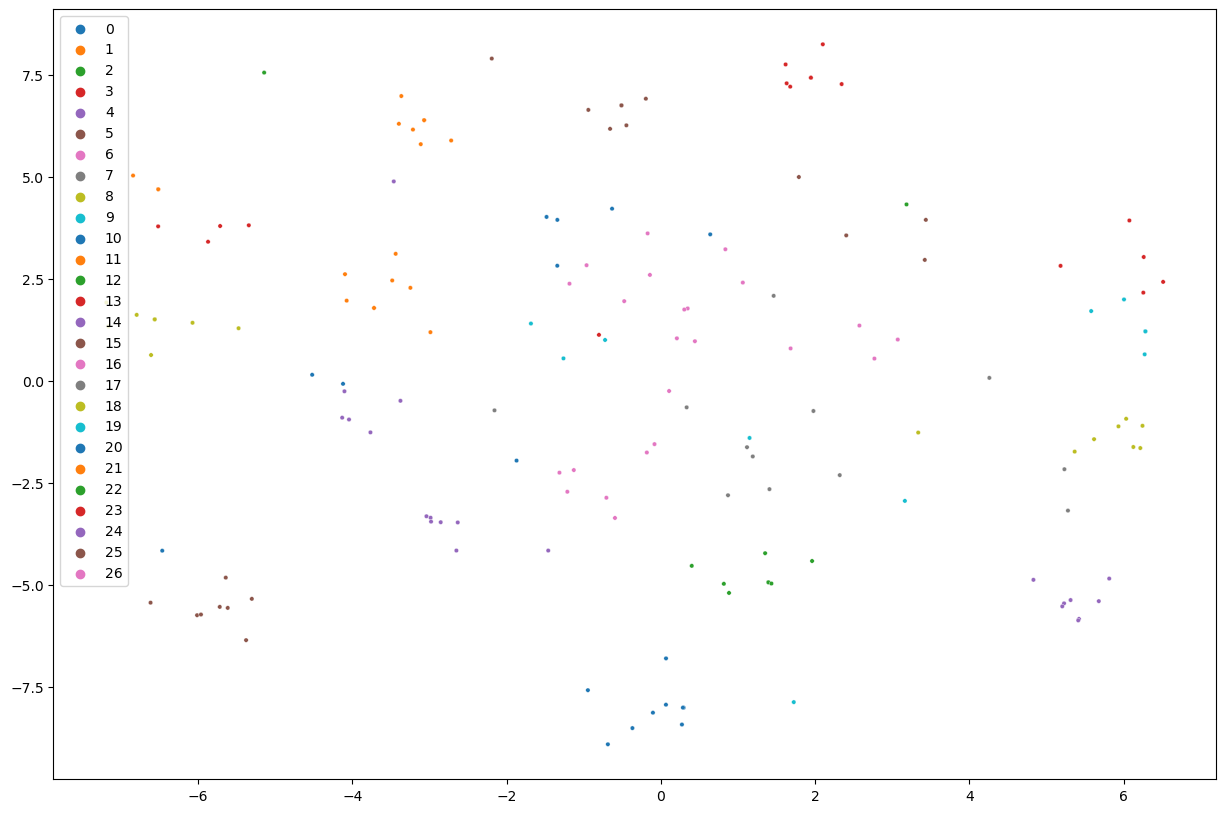

In [78]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1],hue=pred_kmeans[26], palette='tab10', s=10)
plt.show()

In [79]:
rand_score(list(map(int, y)), labels_pred_kmeans)

0.9577235772357724